# MNIST 데이터 준비 및 시각화

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


# 이미지 형상 확인과 시각화

In [1]:
X_train[0]

NameError: ignored

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
IMAGE_IDX = 0

image = X_train[IMAGE_IDX]
image.shape

(28, 28)

채널에 대한 정보가 없기 때문에 GrayScale이미지다!

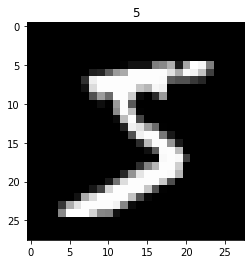

In [ ]:
plt.imshow(image, cmap='gray')
plt.title(y_train[IMAGE_IDX])
plt.show()

# 원래는 (배치사이즈, H, W, C ) = (N, 28, 28, 1)으로 들어있어야함
# 반드시 배치사이즈 부여해줘야함⭐⭐

In [ ]:
image = image[tf.newaxis, ... , tf.newaxis]
image.shape

(1, 28, 28, 1)

# CONV 레이어 사용
keras에는 대표적인 두가지 Conv레이어가 존재
- Conv2D : 방향이두개 direction
  - 필터가 움직이는 방향이 2방향(가로, 세로)
  - 이미지 분석을 위해서 사용하는 일반적인 합성곱 레이어

- Conv1D : 방향이한개
  - 필터가 움직이는 방향이 1방향
  - 텍스트 분석을 위해 사용하는 레이어

# Conv2D 레이어 매개변수 ⭐⭐⭐
- filters : 필터의 개수 =  커널의 개수(C out) (00이론필기 마지막그림보기)
- kernel_size : 커널의크기($H_k$, $W_k$)
- strides : 몇개씩 건너뛰면서 필터가 input feature map을 훑을건지
- padding : 둘러싸기 output feature map크기 유지하기 위해서.
  - 기본값 / 패딩을 안하겠다 = VALID
  - SAME : input feature map과 output feature map의 크기를 똑같이 만들어주는 패딩을 설정
- activation : 활성화함수를 지정(선택가능)



ex) input feature가 (N, 28,28,1) > output feature(N, $H_{out}$, $W_{out}$, $C_{out}$)

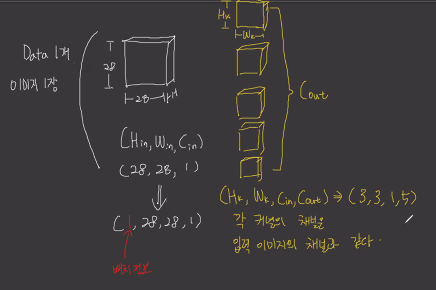

In [ ]:
from tensorflow.keras.layers import Conv2D

layer = Conv2D(
    filters = 5,
    kernel_size=(3,3), # 세로가로가 똑같은 커널을 만들고 싶으면 그냥 3만넣어도됨
    strides = 1,
    padding = 'SAME'

)

layer

In [ ]:
# numpy배열 텐서 이미지를 tensorflow 텐서로 변환. typecasting
image = tf.cast(image, dtype=tf.float32) #⭐cast 해주는게 좋음
image.shape

TensorShape([1, 28, 28, 1])

In [ ]:
# 합성곱 연산을 한번 해보자
# 이미지를 layer에 넣어
conv_output = layer(image)
conv_output.shape
#패딩넣어줘서 (1, 28, 28, 5)가 나올거다⭐⭐

TensorShape([1, 28, 28, 5])

In [ ]:
# 나혼자공부
# tensorflow는 reshape특이하게함
# tf.reshape(텐서, [형식])
abc = tf.reshape(image, [28,28])
abc.shape

TensorShape([28, 28])

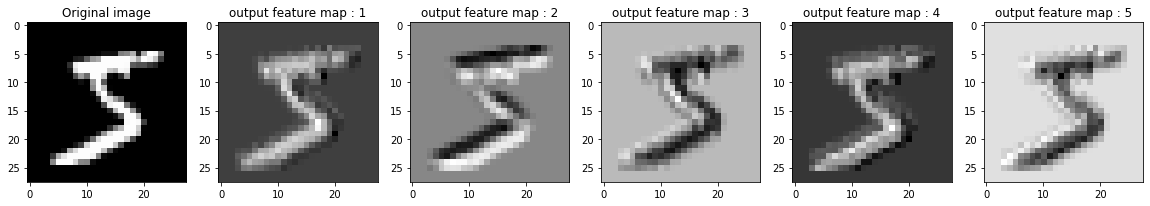

In [ ]:
# 출력특징맵의 각 채널별 이미지를 시각화
# 1번째 = 원본이미지
# 2번째~ 마지막번재는 합성곱 연산 결과이미지
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20,10))


original_image = tf.squeeze(image) # 양옆에 1쥐어짜기
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title("Original image")

output_features = conv_output[0] # (1,28,28,5)에서(28,28,5)가져오기

for idx, ax in enumerate(axes[1:]): # 인덱스도가져오기
  ax.imshow(output_features[..., idx], cmap='gray')
  ax.set_title("output feature map : {}".format(idx + 1))



# axes[1].imshow(output_features[...,0], cmap='gray')
# axes[2].imshow(output_features[...,1], cmap='gray')
# axes[3].imshow(output_features[...,2], cmap='gray')
# axes[4].imshow(output_features[...,3], cmap='gray')
# axes[5].imshow(output_features[...,4], cmap='gray')


plt.show()

# filter 시각화
- CNN에서 Filter는 가중치 역할을 한다.
- 계산 가능한 레이어(학습 대상 레이어, Dense, Conv, LSTM RNN 등등...)에서는 가중치와 편향을 확인할 수 있다.
  - 레이어에서 get_weights()함수를 이용해서 가중치를 가져올 수 있음(저번주에한 캠페인프로젝트에서)

In [ ]:
weights = layer.get_weights()

- weights[0] : 가중치
- weights[1] : 편향이들어있음

In [ ]:
# 필터(가중치)의 shape = 3,3,1,5
weights[0].shape

(3, 3, 1, 5)

# 노란부분

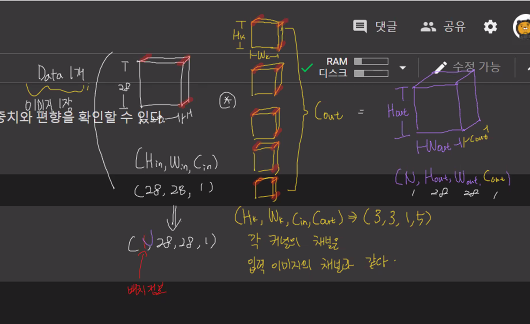

In [ ]:
weights[1].shape

(5,)

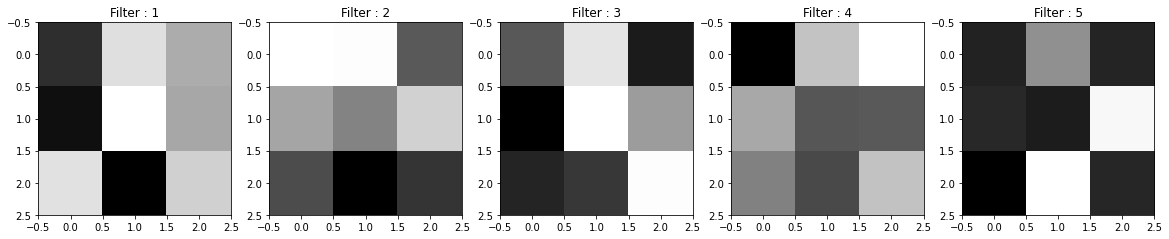

In [ ]:
# 5개의 필터 시각화

_, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

for idx, ax in enumerate(axes):
  ax.set_title("Filter : {}".format(idx + 1))
  ax.imshow(weights[0][..., 0, idx], cmap='gray')

plt.show()

# ReLU 레이어 사용
- 이미지분석에서 자주쓰임. 필요없는 음수데이터 제거하려고
- leakly relu도많이쓰임

In [ ]:
import numpy as np

np.min(conv_output), np.max(conv_output)

(-190.5537, 199.50029)

In [ ]:
from tensorflow.keras.layers import ReLU

act_layer = ReLU()
act_output = act_layer(conv_output) # ReLU에 넣어주기. shape안바꾸고 그냥 스윽
act_output.shape


TensorShape([1, 28, 28, 5])

In [ ]:
np.min(act_output), np.max(act_output)

(0.0, 199.50029)

# ReLU 시각화
- 학습레이어는 아님 그냥 숫자만 바꿔주는거

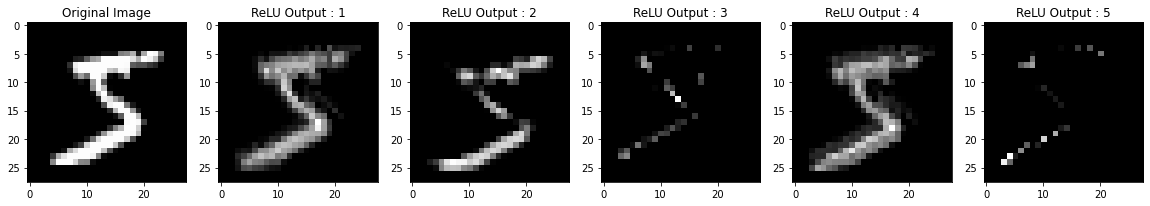

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("ReLU Output : {}".format(idx + 1))
  ax.imshow(act_output[0, ..., idx], cmap='gray')

plt.show()

# MaxPooling
- 이미지 축소, 정보의 종합을 구현
- 필요한 정보가 없어질 수도 있기 때문에!! 최근에는 Conv2D 의 Stride를 증가시키는 방법으로 이미지 축소를 한다.

- 학습레이어는아님 그냥 최대값만 뽑아주는거

In [ ]:
from tensorflow.keras.layers import MaxPool2D # pooling쓰든 pool쓰든 똑같음

pool_layer = MaxPool2D(
    pool_size=(2,2), # 풀링 필터의 크기
    strides=(2,2)
)

pool_output = pool_layer(act_output)
pool_output.shape

TensorShape([1, 14, 14, 5])

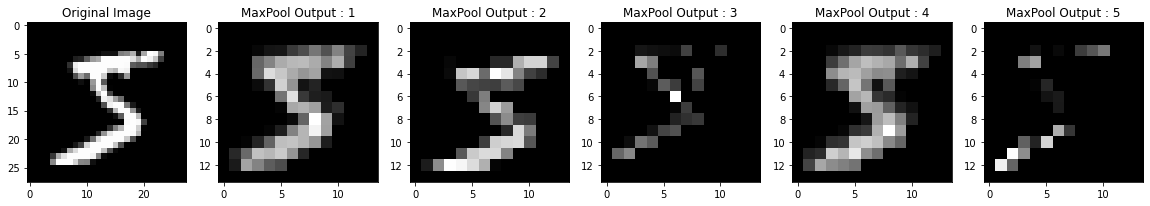

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 10))

axes[0].imshow(image[0, ..., 0], cmap='gray')
axes[0].set_title("Original Image")

for idx, ax in enumerate(axes[1:]):
  ax.set_title("MaxPool Output : {}".format(idx + 1))
  ax.imshow(pool_output[0, ..., idx], cmap='gray')

plt.show()

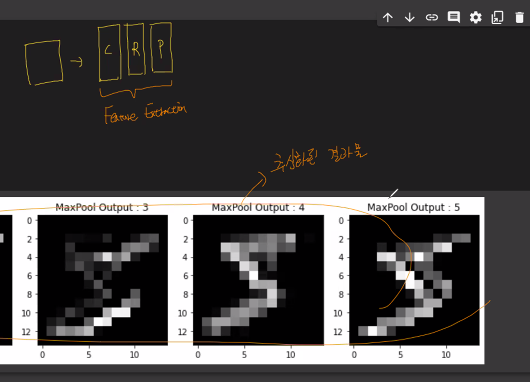

## CNN은 위처럼 추상화된 결과물들 가지고 판별함

Conv - ReLU - MaxPooling 으로 이루어지는 과정을 특징추출과정(feature Extraction)이라고함

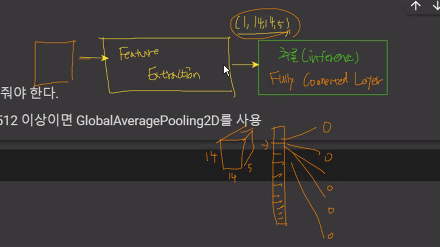

1,14,14,5, 까지 피쳐추출 잘했음

# 이제 추론과정에 넣기위해 평탄화를해야함!!
## Fully connected layer구성
- 특징추출과정까지는 다차원배열이기때문에
- flatten레이어나 GlobalAveragePooling을 이용해서 평탄화해서 넣어줘야함.
  - 최종 output feature map의 채널의 크기가 512미만이면 flatten,
  512이상이면 GlobalAveragePooling2D를 사용

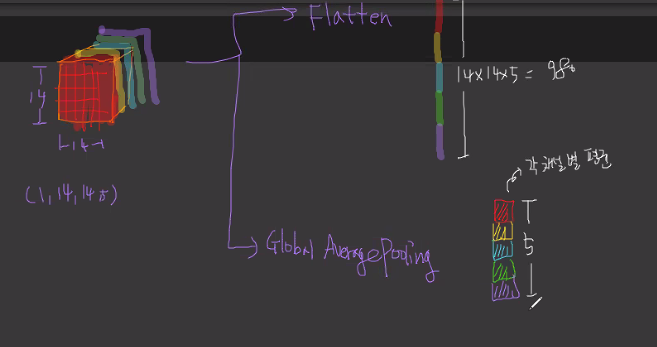

globalaveragepooling은 평균때린 스칼라값임

In [ ]:
from tensorflow.keras.layers import Flatten, GlobalAveragePooling2D

flatten_layer = Flatten()
global_avg_pool = GlobalAveragePooling2D()

flatten_output = flatten_layer(pool_output)
global_avg_pool_output = global_avg_pool(pool_output)

flatten_output.shape, global_avg_pool_output.shape

(TensorShape([1, 980]), TensorShape([1, 5]))

In [ ]:
# 유닛이 32개인 Dense레이어를 만들기 - 은닉층
from tensorflow.keras.layers import Dense

dense_layer = Dense(32, activation='relu')
dense_output = dense_layer(flatten_output) # 980개의 평탄화된 데이터입력

dense_output.shape

TensorShape([1, 32])

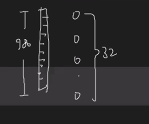

뉴런이 32개니까결과물도 32개

In [ ]:
# 출력층!! 숫자0~9까지니까 출력층뉴런도 10개로설정

output_layer = Dense(10, activation = 'softmax')
output = output_layer(dense_output)

output.shape


TensorShape([1, 10])

# 과제
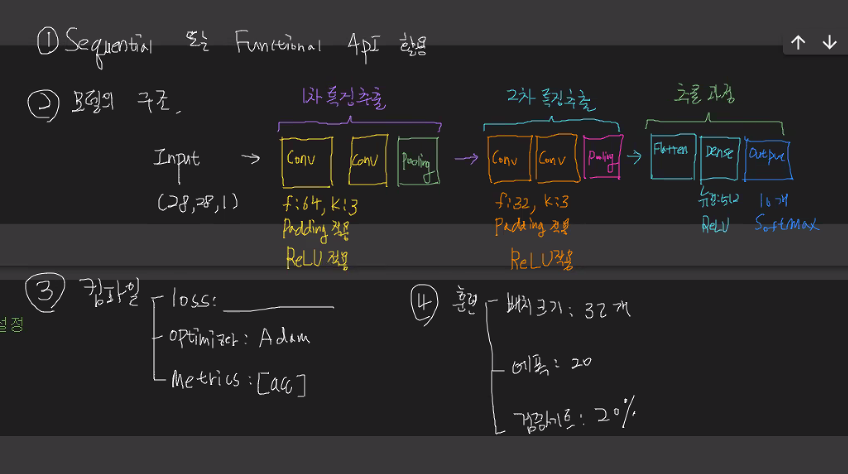

# Sequential Model로 MNIST 분류기 만들기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=(28, 28, 1)), # ( H, W, C )형식으로 입력 될 것이다 라는 것을 의미. N은? 자동으로 세팅이 된다.⭐⭐⭐

    ##### Feature Extraction #####
    Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
    Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=32, kernel_size=3, padding='SAME', activation='relu'),
    Conv2D(filters=32, kernel_size=3, padding='SAME', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    ##### Fully Connected #####
    Flatten(),

    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

# 640 = 3X3 = 9칸짜리 필터 64장 9*64 + 64(편향)
# 28* 28* 64짜리 입력 > 9칸짜리필터 64장(커널수 64) + 편향64 = 36928

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                 

# Functional API로 MNIST 분류기 만들기

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

input = Input(shape=(28, 28, 1)) # ( H, W, C )형식으로 입력 될 것이다 라는 것을 의미. N은? 자동으로 세팅이 된다.

##### Feature Extraction #####
net = Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu')(input)
net = Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)

net = Conv2D(filters=32, kernel_size=3, padding='SAME', activation='relu')(net)
net = Conv2D(filters=32, kernel_size=3, padding='SAME', activation='relu')(net)
net = MaxPooling2D(pool_size=(2, 2))(net)

##### Fully Connected #####
net = Flatten()(net)

net = Dense(512, activation='relu')(net)
output = Dense(10, activation='softmax')(net)

model = tf.keras.Model(inputs = input, outputs= output)
model.summary()

# 훈련!!


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

model.compile(
    optimizer=Adam(),
    loss = sparse_categorical_crossentropy,
    metrics=['acc']
)

model.fit(X_train,
          y_train,
          batch_size=32,
          epochs=20,
          validation_split=0.20)

Epoch 1/20
1500/1500 [==============================] - 10s 5ms/step - loss: 0.1512 - acc: 0.9584 - val_loss: 0.0557 - val_acc: 0.9836
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0519 - acc: 0.9843 - val_loss: 0.0531 - val_acc: 0.9852
Epoch 3/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0402 - acc: 0.9878 - val_loss: 0.0577 - val_acc: 0.9844
Epoch 4/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0291 - acc: 0.9910 - val_loss: 0.0646 - val_acc: 0.9819
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0288 - acc: 0.9912 - val_loss: 0.0619 - val_acc: 0.9838
Epoch 6/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0239 - acc: 0.9924 - val_loss: 0.0615 - val_acc: 0.9831
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0178 - acc: 0.9945 - val_loss: 0.0623 - val_acc: 0.9874
Epoch 8/20
1500/1500 [==============================] - 8s 5m

In [ ]:
# 모델 평가까지!
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0691 - acc: 0.9902


[0.06913484632968903, 0.9901999831199646]